# Binary Image Classification (Kaggle Dataset - Cat vs Dog)

# Name: Prashanth B

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',\
                                 activation='relu', input_shape=[32,32,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',\
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [15]:
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
#fit CNN to images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [18]:
#rescale image
datagen = ImageDataGenerator(rescale=1./255)

In [19]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32,32),
                                           classes=['dogs','cats'], class_mode='binary', batch_size=20)

Found 8005 images belonging to 2 classes.


In [20]:
test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32,32),
                                           classes=['dogs','cats'], class_mode='binary', batch_size=20)

Found 2023 images belonging to 2 classes.


In [21]:
len(training_set), len(test_set)

(401, 102)

In [24]:
import warnings
warnings.filterwarnings('ignore')

history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=10,
                              validation_data=test_set, validation_steps=102)

Epoch 1/10
401/401 [==============================] - 38s 96ms/step - loss: 0.6500 - accuracy: 0.6220 - val_loss: 0.6044 - val_accuracy: 0.6817
Epoch 2/10
401/401 [==============================] - 37s 92ms/step - loss: 0.5864 - accuracy: 0.6889 - val_loss: 0.5597 - val_accuracy: 0.7192
Epoch 3/10
401/401 [==============================] - 39s 96ms/step - loss: 0.5516 - accuracy: 0.7172 - val_loss: 0.5605 - val_accuracy: 0.7138
Epoch 4/10
401/401 [==============================] - 37s 93ms/step - loss: 0.5308 - accuracy: 0.7319 - val_loss: 0.5538 - val_accuracy: 0.7182
Epoch 5/10
401/401 [==============================] - 37s 93ms/step - loss: 0.4988 - accuracy: 0.7555 - val_loss: 0.5199 - val_accuracy: 0.7479
Epoch 6/10
401/401 [==============================] - 37s 93ms/step - loss: 0.4752 - accuracy: 0.7681 - val_loss: 0.5004 - val_accuracy: 0.7608
Epoch 7/10
401/401 [==============================] - 38s 95ms/step - loss: 0.4503 - accuracy: 0.7861 - val_loss: 0.5291 - val_accuracy:

In [31]:
def learning_curve(history, epoch):

  #training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.figure(figsize=(5,3))
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  #training vs validation loss
  plt.figure(figsize=(5,3))
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()


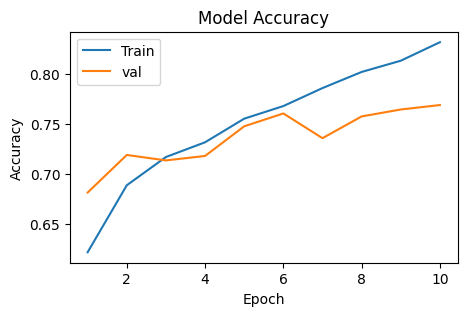

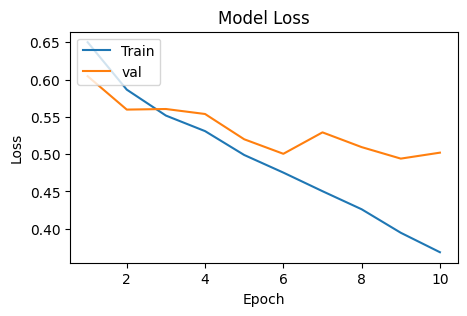

In [32]:
learning_curve(history, 10)

# Thank you